In [ ]:
import pendulum
from WIP.quick_eval import QuickFloEval

house_alias = 'beech'
timezone = 'America/New_York'
YEAR, MONTH, DAY, HOUR = 2025, 2, 25, 20

start_ms = pendulum.datetime(YEAR, MONTH, DAY, HOUR, tz=timezone).timestamp() * 1000
f = QuickFloEval(house_alias, start_ms, timezone)

Found flo params at hour 2025-02-26T03:00:00-05:00
Found flo params at hour 2025-02-26T04:00:00-05:00
Found flo params at hour 2025-02-26T05:00:00-05:00
Found flo params at hour 2025-02-26T06:00:00-05:00
Found flo params at hour 2025-02-26T07:00:00-05:00
Estimated storage at the start: 143(16)121
Hour 0 options: [0.0, 0.0, 4.5, 6.76, 9.01, 11.26, 13.51, 15.77, 18.02, 20.27] kWh_th
Hour 1 options: [0.0, 0.0, 20.27] kWh_th
Hour 2 options: [0.0, 0.3, 20.27] kWh_th
Hour 3 options: [0.0, 4.04, 20.27] kWh_th
Hour 4 options: [0.0, 4.22, 19.98] kWh_th
There are 810 possible combinations

The best path forward is (15.77, 0.0, 0.0, 0.0, 0.0)
Estimated storage at the start: 154(8)138
Hour 0 options: [0.0, 0.0, 4.63, 6.94, 9.26, 11.57, 13.89, 16.2, 18.52, 20.83] kWh_th
Hour 1 options: [0.0, 0.0, 20.55] kWh_th
Hour 2 options: [0.0, 0.0, 20.55] kWh_th
Hour 3 options: [0.0, 0.19, 20.55] kWh_th
Hour 4 options: [0.0, 3.68, 20.83] kWh_th
There are 810 possible combinations

The best path forward is (4.6

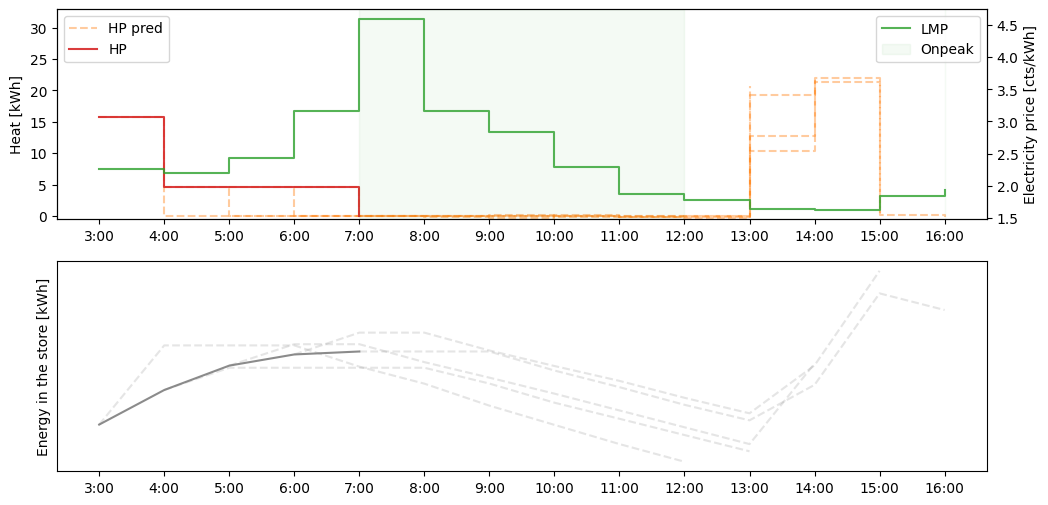

In [2]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,1, figsize=(12,6))
ax2 = ax[0].twinx()
all_times, all_hps, first_hps, first_energy = [], [], [], []
plot_hours = 10
for i in range(len(f.plots_times)):
    all_times.extend(f.plots_times[i][:plot_hours])
    all_hps.extend(f.plots_hps[i][:plot_hours])
    first_hps.append(f.plots_hps[i][0])
    first_energy.append(f.plots_energy[i][0])
    if i==0:
        ax[0].step(f.plots_times[i][:plot_hours], f.plots_hps[i][:plot_hours], where='post', alpha=0.4, color='tab:orange', label='HP pred', linestyle='dashed')
    else:
        ax[0].step(f.plots_times[i][:plot_hours], f.plots_hps[i][:plot_hours], where='post', alpha=0.4, color='tab:orange', linestyle='dashed')
    ax[1].plot(f.plots_times[i][:plot_hours], f.plots_energy[i][:plot_hours], alpha=0.2, color='tab:gray', linestyle='dashed')
all_times = sorted(list(set(all_times)))
ax[0].step(all_times[:len(first_hps)], first_hps, where='post', alpha=0.9, color='tab:red', label='HP')
ax[1].plot(all_times[:len(first_energy)], first_energy, alpha=0.9, color='tab:gray', label='Energy')
# ax[0].set_title(f'{start}', fontsize=10)
ax[0].set_ylabel('Heat [kWh]')
ax[0].set_ylim([-0.5, 1.5*max(all_hps)])
ax[0].legend(loc='upper left')
ax[0].set_xticks(all_times)
ax[0].set_xticklabels([f'{x.hour}:00' for x in all_times])
ax[1].set_ylabel('Energy in the store [kWh]')
# ax[1].set_ylim([max(-1,min(sp_soc[:plot_hours])-10),101])
ax[1].set_yticks([])
ax[1].set_xticks([x for x in all_times])
ax[1].set_xticklabels([f'{x.hour}:00' for x in all_times])
ax2.step(all_times, f.plots_lmps[0][:len(all_times)], where='post', color='tab:green', alpha=0.8, label='LMP')
ax2.set_ylabel('Electricity price [cts/kWh]')
yticks = list(set([int(x) for x in f.plots_lmps[0][:len(all_times)]]))
yticks = sorted(yticks+[x+0.5 for x in yticks])
if len(ax2.get_yticks())>=6 and len(yticks)<=6:
    ax2.set_yticks(yticks)

plot_hours = len(all_times)
done_mornings = {}
done_afternoons = {}
not_labeled = True
for i, x in enumerate(sorted(all_times)):
    if x.hour in [7,8,9,10,11,16,17,18,19] and x.weekday() not in [5,6]:
        if x.hour in [7,8,9,10,11] and x.date() not in done_mornings:
            end_index = i+5-(x.hour-7) if i==0 else min(i+5, plot_hours-1)
            done_mornings[x.date()] = True
            if not_labeled:
                ax2.axvspan(all_times[i], all_times[end_index], color='tab:green', alpha=0.05, label='Onpeak')
                not_labeled = False
            else:
                ax2.axvspan(all_times[i], all_times[end_index], color='tab:green', alpha=0.05)
        elif x.hour in [16,17,18,19] and x.date() not in done_afternoons:
            end_index = i+4-(x.hour-16) if i==0 else min(i+4, plot_hours-1)
            done_afternoons[x.date()] = True
            if not_labeled:
                ax2.axvspan(all_times[i], all_times[end_index], color='tab:green', alpha=0.05, label='Onpeak')
                not_labeled = False
            else:
                ax2.axvspan(all_times[i], all_times[end_index], color='tab:green', alpha=0.05)
ax2.legend(loc='upper right')
plt.show()

In [3]:
# 